<p style="font-size:25px"><b>Importing Libraries and Data</b></p>


In [32]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors 
realestate_sales = pd.read_csv("http://raptor.kent.ac.uk/~ds756/Data/kc_house_data_small.csv")

<p style="font-size:25px"><b>Data Exploration</b></p>

In [33]:
realestate_sales.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1423800210,20140923T000000,230000.0,3,1.00,1640,7187,1.0,0,0,...,7,1640,0,1966,0,98058,47.4550,-122.182,1340,8346
2,2125049131,20140729T000000,680000.0,3,1.75,1620,5500,1.0,0,0,...,7,1110,510,1950,0,98112,47.6393,-122.308,2100,6500
3,5318101765,20140602T000000,985000.0,3,1.75,1670,5400,2.0,0,0,...,8,1670,0,1912,0,98112,47.6350,-122.284,2100,5400
4,6624300110,20140623T000000,375000.0,4,2.50,1870,7471,2.0,0,0,...,8,1870,0,1990,0,98055,47.4314,-122.204,2020,8912


In [34]:
realestate_sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1423800210,20140923T000000,230000.0,3,1.00,1640,7187,1.0,0,0,...,7,1640,0,1966,0,98058,47.4550,-122.182,1340,8346
2,2125049131,20140729T000000,680000.0,3,1.75,1620,5500,1.0,0,0,...,7,1110,510,1950,0,98112,47.6393,-122.308,2100,6500
3,5318101765,20140602T000000,985000.0,3,1.75,1670,5400,2.0,0,0,...,8,1670,0,1912,0,98112,47.6350,-122.284,2100,5400
4,6624300110,20140623T000000,375000.0,4,2.50,1870,7471,2.0,0,0,...,8,1870,0,1990,0,98055,47.4314,-122.204,2020,8912


In [35]:
print(realestate_sales.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


<p style="font-size:25px"><b>Data Manipulation</b></p>
<p style="font-size:15px"><b>Price per Sqft per Zipcode</b></p>

In [36]:
#avr price per sqr ft by zip code
realestate_sales["unit_price"] = realestate_sales["price"] / realestate_sales["sqft_living"]
subdf = realestate_sales.groupby("zipcode")["unit_price"].mean()
subdf.head()

zipcode
98001    155.791298
98002    152.284512
98003    158.400200
98004    481.385148
98005    294.317493
Name: unit_price, dtype: float64

<p style="font-size:15px"><b>Mean Price by Bedroom Count Visualisation</b></p>


In [37]:
#mean price per bedroom count
avr_bed = realestate_sales.groupby("bedrooms")["price"].mean().reset_index()
avr_bed.head()


,bedrooms,price
0,0,295000.000000
1,1,354108.695652
2,2,422607.790123
3,3,473592.012670
4,4,662161.135690


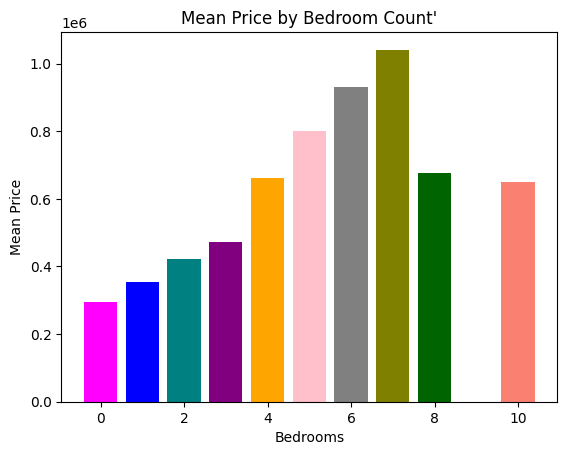

In [38]:
colors=['magenta', 'blue', 'teal', 'purple', 'orange', 'pink','gray','olive','darkgreen','salmon']
plt.bar(avr_bed["bedrooms"], avr_bed["price"], color=colors[:len(avr_bed)])

plt.xlabel("Bedrooms")
plt.ylabel("Mean Price")
plt.title("Mean Price by Bedroom Count'")

plt.show()

<p style="font-size:15px"><b>Waterfront vs Non-Waterfront properties</b></p>

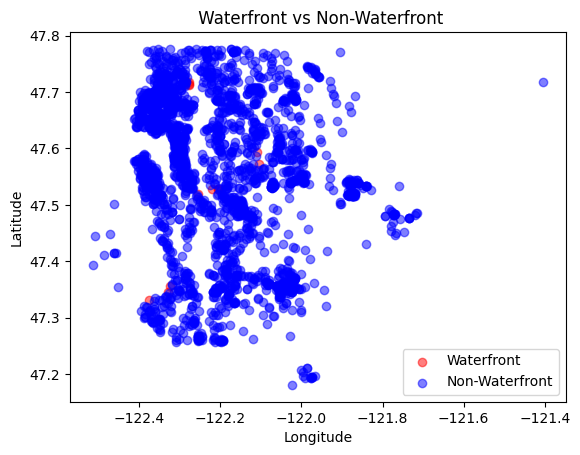

In [39]:
# waterfront plot and scatter
waterfront = realestate_sales[realestate_sales["waterfront"] == 1]
plt.scatter(waterfront["long"], waterfront["lat"], color='red', label='Waterfront', alpha=0.5)

#non waterfront plot and scatter
non_waterfront = realestate_sales[realestate_sales["waterfront"] == 0]
plt.scatter(non_waterfront["long"], non_waterfront["lat"], color='blue', label='Non-Waterfront', alpha=0.5)

# Assign axis
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(" Waterfront vs Non-Waterfront")

# displays the key
plt.legend(loc="lower right")


plt.show()


<p style="font-size:15px"><b>Time-Series of Daily Mean Price</b></p>

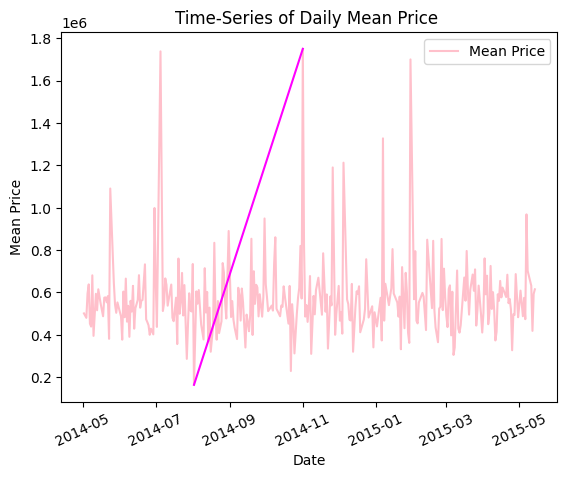

In [40]:

# Convert 'date'column to datetime & set as the index
realestate_sales['date'] = pd.to_datetime(realestate_sales['date'])
realestate_sales = realestate_sales.set_index("date")


# Group by date and calculate the mean price
ts_sales = realestate_sales.groupby("date")["price"].mean()

#create time-series data
plt.plot(ts_sales.index, ts_sales.values, label="Mean Price", color="pink")


#Design
plt.xlabel("Date")
plt.ylabel("Mean Price")
plt.title("Time-Series of Daily Mean Price ")
plt.legend()
plt.xticks(rotation=25)  


#overlay from the smallest daily average to the highest daily average
min_price = ts_sales.min()
max_price = ts_sales.max()
min_date = ts_sales.idxmin()
max_date = ts_sales.idxmax()
plt.plot([min_date, max_date], [min_price, max_price], color="magenta", label="Min to Max Line")


plt.show()
